### Task 1: Exploratory Data Analysis (EDA)
### Import necessary libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

### Load the dataset into notebook 

In [16]:
df = pd.read_csv("ToyotaCorolla.csv")

In [18]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [22]:
df.shape

(1436, 11)

In [82]:
df.dtypes

Price          int64
Age_08_04      int64
KM             int64
Fuel_Type    float64
HP             int64
Automatic      int64
cc             int64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
3              int32
dtype: object

In [80]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
3            0
dtype: int64

In [64]:
# As i encountered Fuel_Type as object , so converting that into float for correlation 
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[['Fuel_Type']] = ordinal_encoder.fit_transform(df[['Fuel_Type']])

In [68]:
df.dtypes

Price          int64
Age_08_04      int64
KM             int64
Fuel_Type    float64
HP             int64
Automatic      int64
cc             int64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
3              int32
dtype: object

### Summary statistics and visualizations

              Price    Age_08_04             KM    Fuel_Type           HP  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749     1.868384   101.502089   
std     3626.964585    18.599988   37506.448872     0.371572    14.981080   
min     4350.000000     1.000000       1.000000     0.000000    69.000000   
25%     8450.000000    44.000000   43000.000000     2.000000    90.000000   
50%     9900.000000    61.000000   63389.500000     2.000000   110.000000   
75%    11950.000000    70.000000   87020.750000     2.000000   110.000000   
max    32500.000000    80.000000  243000.000000     2.000000   192.000000   

         Automatic           cc        Doors  Cylinders        Gears  \
count  1436.000000   1436.00000  1436.000000     1436.0  1436.000000   
mean      0.055710   1576.85585     4.033426        4.0     5.026462   
std       0.229441    424.38677     0.952677        0.0     0.188510   
min       0.000000

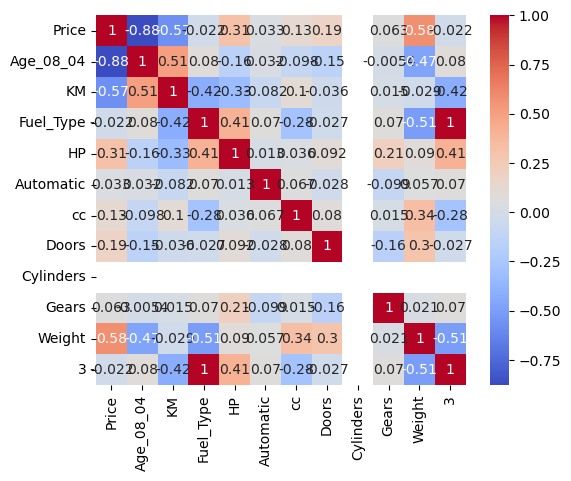

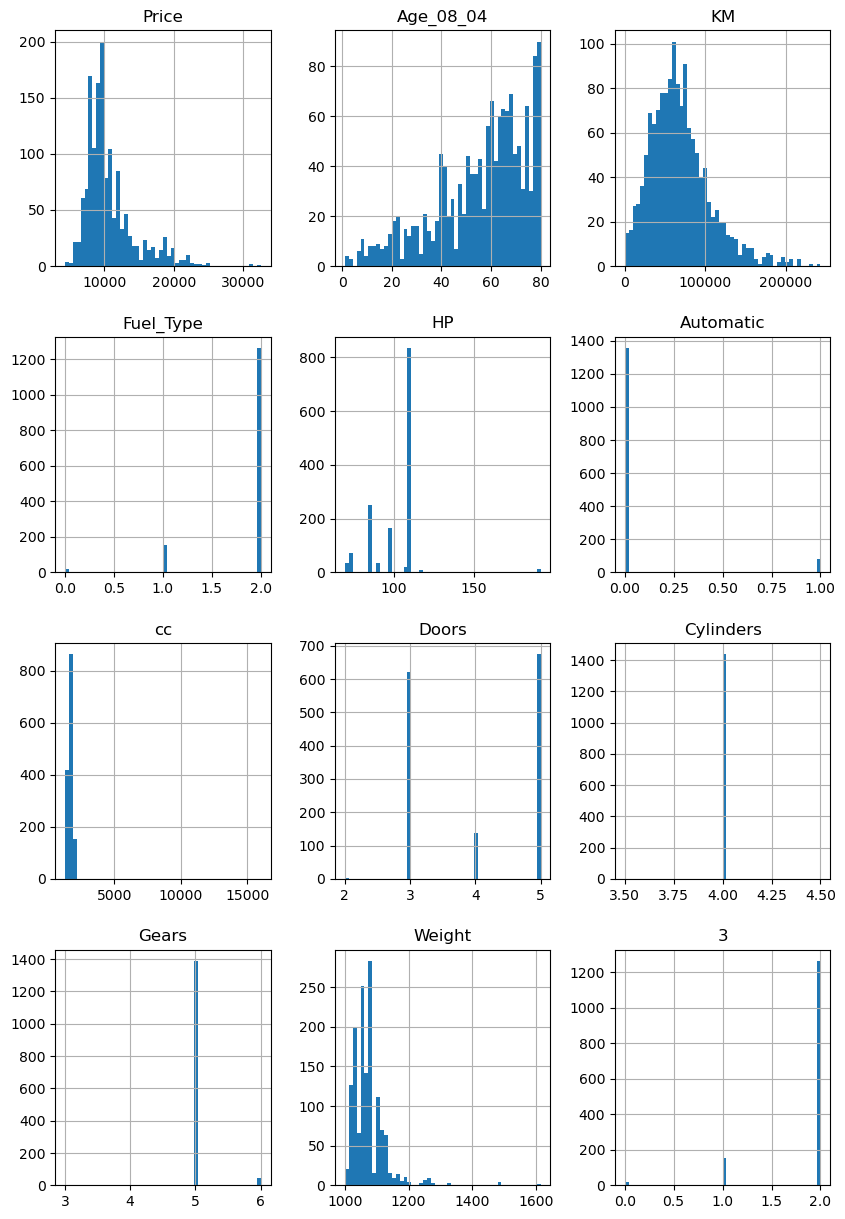

In [72]:

print(df.describe())

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

# Histograms for numerical variables
df.hist(bins=50, figsize=(10,15))
plt.show()

### Pre-processing for MLR

In [97]:
# Checking for null values again ,if any missing values still present, replace with "Mean'
df.fillna(df.mean(), inplace=True)



In [112]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,3
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,1.868384
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.371572
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,2.000000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,2.000000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,2.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,2.000000


### Task 2 : # Split dataset into training and testing sets


In [134]:
# Split dataset into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 3: Build multiple linear regression models

In [136]:
# Create and fit model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Print coefficients
print("Model 1 Coefficients:", model1.coef_)

Model 1 Coefficients: [-1.21436240e+02 -1.69355966e-02  4.31028215e+02  2.06582831e+01
  2.45196891e+02 -7.35153881e-02 -3.62796477e+01  0.00000000e+00
  5.30282040e+02  2.35106426e+01  4.31028215e+02]


In [146]:
# Model 1: Simple Multiple Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))
print("Model 1 R2:", r2_score(y_test, y_pred1))

Model 1 Coefficients: [-1.21436240e+02 -1.69355966e-02  4.31028215e+02  2.06582831e+01
  2.45196891e+02 -7.35153881e-02 -3.62796477e+01  0.00000000e+00
  5.30282040e+02  2.35106426e+01  4.31028215e+02]
Model 1 Intercept: -12636.278112384516
Model 1 MSE: 2096851.1400176967
Model 1 R2: 0.8428476112018007


In [170]:
# Model 2: Multiple Linear Regression with Interaction Terms
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
y_pred2 = model2.predict(poly_features.transform(X_test))
print("Model 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)
print("Model 2 MSE:", mean_squared_error(y_test, y_pred2))
print("Model 2 R2:", r2_score(y_test, y_pred2))

Model 2 Coefficients: [-1.13775927e-02 -1.96571971e+01 -3.27073691e-02 -1.12149304e+03
 -1.56505218e+02  6.43217675e+02  7.75318123e-01 -1.86626989e+03
  2.19902679e-04  1.58265574e+04  8.53999924e+01 -1.12149903e+03
  1.46882126e-02  3.93346562e-04 -1.07547729e+01 -5.15805382e-01
  8.45108369e+00  4.15012586e-03  1.23173354e+01 -8.19527713e+01
  2.10335111e+02 -7.53590195e-01 -1.07559160e+01 -8.72046897e-08
  5.39710640e-03 -1.35825594e-04 -1.98236600e-03 -4.37806148e-06
 -3.31518636e-03 -4.40280877e-02 -1.64468917e-03  1.94451975e-04
  5.39843356e-03  1.50343173e+03 -1.80469895e+01  5.64822124e+03
 -1.82574357e+00 -7.01486128e+01 -4.48599829e+03  3.22234069e+02
  1.67734525e+01  1.50343173e+03  2.27326119e-01 -1.68616383e+02
  1.77757559e-03 -4.49864000e+00 -6.26041142e+02  5.26128671e+02
  6.54897023e-02 -1.80469895e+01  6.43218964e+02  1.13725235e+01
 -2.53541215e+02  2.57287585e+03 -5.85453213e+03 -4.01643238e+00
  5.64822124e+03 -1.23157755e-03 -9.23507256e-01  3.09642374e+00
 -4

In [172]:
# Model 3: Multiple Linear Regression with Polynomial Terms
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(scaler.transform(X_test))
print("Model 3 Coefficients:", model3.coef_)
print("Model 3 Intercept:", model3.intercept_)
print("Model 3 MSE:", mean_squared_error(y_test, y_pred3))
print("Model 3 R2:", r2_score(y_test, y_pred3))

Model 3 Coefficients: [-2.28237158e+03 -6.28736987e+02 -2.61633446e+16  3.10664659e+02
  5.50990590e+01 -3.65061235e+01 -3.92468614e+01 -3.60437845e+13
  1.02054024e+02  1.20075850e+03  2.61633446e+16]
Model 3 Intercept: 10754.395470383277
Model 3 MSE: 2099943.0192027315
Model 3 R2: 0.8426158845949232


### Task 4 : Evalution of performance of the model using Evaluation metrix on dataset testing: 

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [182]:
print("Model 1 Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MedAE:", median_absolute_error(y_test, y_pred1))
print("R2:", r2_score(y_test, y_pred1))

Model 1 Metrics:
MSE: 2096851.1400176967
RMSE: 1448.0508071258055
MAE: 992.8982858371403
MedAE: 713.4891787462311
R2: 0.8428476112018007


In [184]:
print("\nModel 2 Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred2))
print("RMSE:", mean_squared_error(y_test, y_pred2)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MedAE:", median_absolute_error(y_test, y_pred2))
print("R2:", r2_score(y_test, y_pred2))


Model 2 Metrics:
MSE: 2998364.7783901673
RMSE: 1731.5786954077967
MAE: 907.7719945336115
MedAE: 684.2804532280425
R2: 0.7752820033717694


In [186]:
print("\nModel 3 Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred3))
print("RMSE:", mean_squared_error(y_test, y_pred3)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MedAE:", median_absolute_error(y_test, y_pred3))
print("R2:", r2_score(y_test, y_pred3))


Model 3 Metrics:
MSE: 2099943.0192027315
RMSE: 1449.1180142427088
MAE: 992.964157883514
MedAE: 709.9999999999991
R2: 0.8426158845949232


### Task 5 : LassoRegression :

In [189]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Print coefficients
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Coefficients: [-1.21429828e+02 -1.69413246e-02  1.14078934e-01  2.06756273e+01
  2.43149752e+02 -7.34923238e-02 -3.62415995e+01  0.00000000e+00
  5.27451257e+02  2.35067656e+01  8.60697238e+02]


###  Ridge Regression 

In [192]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Print coefficients
print("Ridge Coefficients:", ridge_model.coef_)


Ridge Coefficients: [-1.21434669e+02 -1.69372241e-02  4.30796327e+02  2.06659988e+01
  2.44714244e+02 -7.35208861e-02 -3.63143871e+01  0.00000000e+00
  5.28979294e+02  2.35092754e+01  4.30796327e+02]


### Conclusion and some of the assumptions and their implications related to the Multiple Linear Regression (MLR) model

In [ ]:


Assumptions:
Linearity: The relationship between each independent variable and the dependent variable is linear.
Implication: Non-linear relationships may not be captured accurately.
Independence: Each observation is independent of the others.

Implication: Violations may lead to inaccurate standard errors and hypothesis tests.
Homoscedasticity: Constant variance of residuals across all levels of the independent variables.
Implication: Non-constant variance may affect hypothesis tests and confidence intervals.

Normality: Residuals follow a normal distribution.
Implication: Non-normal residuals may affect hypothesis tests and confidence intervals.
No multicollinearity: Independent variables are not highly correlated with each other.

Implication: Multicollinearity can lead to unstable estimates and inflated variance.
No autocorrelation: Residuals are not correlated with each other.

Implications for our MLR model:
Model interpretability: Assumptions affect the accuracy and reliability of model interpretations.
Prediction accuracy: Violations can lead to poor predictive performance.
Hypothesis testing: Assumptions affect the validity of hypothesis tests and confidence intervals.
Mitigation strategies for our MLR model:
Data transformation: Address non-linearity and non-normality.
Variable selection: Reduce multicollinearity.
Robust standard errors: Account for heteroscedasticity and autocorrelation.
Influential outlier detection: Identify and address influential data points.
Model validation: Verify assumptions and model performance using diagnostics and metrics.